In [94]:
#this case requires to develop a customer segmentation to define marketing strategy. 
#The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. 
#The file is at a customer level with 18 behavioral variables.

#CUST_ID: Identification of Credit Card holder (Categorical)

#BALANCE: Balance amount left in their account to make purchases 

#BALANCE_FREQUENCY : How frequently the Balance is updated, 
#score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

#PURCHASES: Amount of purchases made from account 

#********************==== purchases = oneoffpurchases + installmentpurchases

#ONEOFF_PURCHASES: Maximum purchase amount done in one-go

#INSTALLMENTS_PURCHASES: Amount of purchase done in installment

#CASH_ADVANCE: Cash in advance given by the user

#PURCHASES_FREQUENCY: How frequently the Purchases are being made, 
#score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

#********************==== PURCHASES_FREQUENCY = ONEOFFPURCHASESFREQUENCY + PURCHASESINSTALLMENTSFREQUENCY

#ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go 
#(1 = frequently purchased, 0 = not frequently purchased)

#PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done 
#(1 = frequently done, 0 = not frequently done)

#CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

#CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 

#PURCHASES_TRX: Number of purchase transactions made

#CREDIT_LIMIT: Limit of Credit Card for user 

#PAYMENTS: Amount of Payment done by user 

#MINIMUM_PAYMENTS: Minimum amount of payments made by user 

#PRCFULLPAYMENT: Percent of full payment paid by user

#TENURE: Tenure of credit card service for user


#1. Load your dataset. 
import pandas as pd
import numpy as np

data=pd.read_csv("CC GENERAL.csv")
data=data.drop("CUST_ID", axis=1)
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(0)
data=data.dropna(axis='rows', how="any", inplace=False)

#data standardisation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data['BALANCE']=scaler.fit_transform(data[['BALANCE']].values)
data['PURCHASES']=scaler.fit_transform(data[['PURCHASES']].values)
data['ONEOFF_PURCHASES']=scaler.fit_transform(data[['ONEOFF_PURCHASES']].values)
data['INSTALLMENTS_PURCHASES']=scaler.fit_transform(data[['INSTALLMENTS_PURCHASES']].values)
data['CASH_ADVANCE']=scaler.fit_transform(data[['CASH_ADVANCE']].values)
data['CASH_ADVANCE_TRX']=scaler.fit_transform(data[['CASH_ADVANCE_TRX']].values)
data['PURCHASES_TRX']=scaler.fit_transform(data[['PURCHASES_TRX']].values)
data['CREDIT_LIMIT']=scaler.fit_transform(data[['CREDIT_LIMIT']].values)
data['PAYMENTS']=scaler.fit_transform(data[['PAYMENTS']].values)
data['MINIMUM_PAYMENTS']=scaler.fit_transform(data[['MINIMUM_PAYMENTS']].values)
data['TENURE']=scaler.fit_transform(data[['TENURE']].values)

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.250000,0.03252,0.000000,0.232053,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.083333,0.00813,0.002793,0.248748,0.000000,0.000000,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [95]:
from sklearn.decomposition import PCA


pca=PCA(n_components=2)
data=pca.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1
0,-0.470349,-0.113123
1,-0.614206,-0.025140
2,0.311286,0.888305
3,-0.581968,-0.028791
4,-0.543022,0.041675
...,...,...
8944,0.653617,-0.473543
8945,0.555815,-0.362027
8946,0.368332,-0.426698
8947,-0.645370,-0.234537


In [105]:
#2. Use hierarchical clustering to identify the inherent groupings within your data.
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,0
3,2
4,2
...,...
8944,1
8945,1
8946,1
8947,2


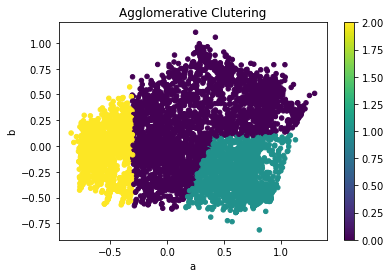

In [106]:
#3. Plot the clusters. 
import matplotlib.pyplot as plt

fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data [0] , data [1] , c= agglomerative, s=20)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("a")
ax.set_ylabel("b")
plt.colorbar(scatter)

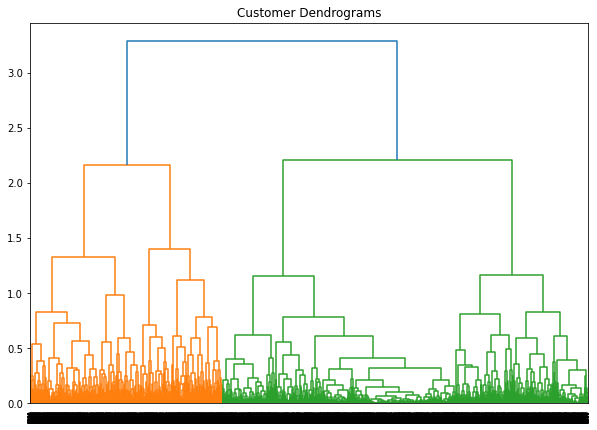

In [107]:
#4. Plot the dendrogram. 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

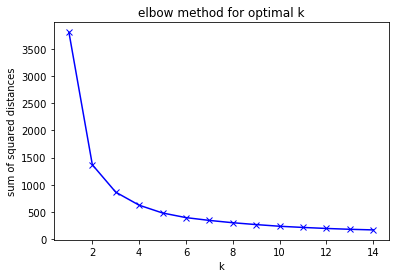

In [99]:
#5. Use k-means clustering. Try different k values and select the best one. 
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

sum_s_d=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    sum_s_d.append(km.inertia_)
    
plt.plot(K, sum_s_d, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('elbow method for optimal k')
plt.show()

In [112]:
#k=3 is the best
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
data['label']=labels
data.head()

,0,1,label
0,-0.470349,-0.113123,2
1,-0.614206,-0.025140,2
2,0.311286,0.888305,0
3,-0.581968,-0.028791,2
4,-0.543022,0.041675,2


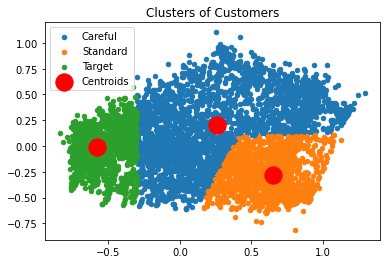

In [114]:
#6. Plot the clusters. 

plt.scatter(data[0][data.label == 0],          
            data[1][data.label == 0],s=20,label='Careful')
plt.scatter(data[0][data.label == 1],
           data[1][data.label == 1],s=20,label='Standard')
plt.scatter(data[0][data.label == 2],
           data[1][data.label == 2],s=20,label='Target')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()